In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
import os
    

In [2]:
# Load the dataset
a1 = pd.read_excel("case_study1.xlsx")
a2 = pd.read_excel("case_study2.xlsx")


In [3]:
df1 = a1.copy()
df2 = a2.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [6]:
# Remove nulls here -99999 is considered as Null value because our system at the time of data input
# automatically punchs the input data as -99999

In [7]:

test1 = (df1 == -99999).sum()


In [8]:
(df1 == -99999)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51332,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51334,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
test2 = (df2 == -99999).sum()

In [10]:
print(test1)

PROSPECTID               0
Total_TL                 0
Tot_Closed_TL            0
Tot_Active_TL            0
Total_TL_opened_L6M      0
Tot_TL_closed_L6M        0
pct_tl_open_L6M          0
pct_tl_closed_L6M        0
pct_active_tl            0
pct_closed_tl            0
Total_TL_opened_L12M     0
Tot_TL_closed_L12M       0
pct_tl_open_L12M         0
pct_tl_closed_L12M       0
Tot_Missed_Pmnt          0
Auto_TL                  0
CC_TL                    0
Consumer_TL              0
Gold_TL                  0
Home_TL                  0
PL_TL                    0
Secured_TL               0
Unsecured_TL             0
Other_TL                 0
Age_Oldest_TL           40
Age_Newest_TL           40
dtype: int64


In [11]:
print(test2)

PROSPECTID                          0
time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
                                ...  
GL_Flag                             0
last_prod_enq2                      0
first_prod_enq2                     0
Credit_Score                        0
Approved_Flag                       0
Length: 62, dtype: int64


In [12]:
test1[test1 > 0] # This code gives me how many values have -99999 values in df1

Age_Oldest_TL    40
Age_Newest_TL    40
dtype: int64

In [13]:
test2[test2 > 0]

time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
max_delinquency_level           35949
max_deliq_6mts                  12890
max_deliq_12mts                 10832
tot_enq                          6321
CC_enq                           6321
CC_enq_L6m                       6321
CC_enq_L12m                      6321
PL_enq                           6321
PL_enq_L6m                       6321
PL_enq_L12m                      6321
time_since_recent_enq            6321
enq_L12m                         6321
enq_L6m                          6321
enq_L3m                          6321
pct_currentBal_all_TL              72
CC_utilization                  47636
PL_utilization                  44435
max_unsec_exposure_inPct        23178
dtype: int64

In [14]:
# its always good to find the percentage of missing values in the 

In [15]:
(test1[test1 > 0]/ len(df1))*100  # this is only 0.07% very less so we can remove these values


Age_Oldest_TL    0.077918
Age_Newest_TL    0.077918
dtype: float64

In [16]:
len(df1)

51336

In [17]:
(test2[test2 > 0]/ len(df2))*100

time_since_recent_payment        8.358657
time_since_first_deliquency     70.026882
time_since_recent_deliquency    70.026882
max_delinquency_level           70.026882
max_deliq_6mts                  25.109085
max_deliq_12mts                 21.100203
tot_enq                         12.312997
CC_enq                          12.312997
CC_enq_L6m                      12.312997
CC_enq_L12m                     12.312997
PL_enq                          12.312997
PL_enq_L6m                      12.312997
PL_enq_L12m                     12.312997
time_since_recent_enq           12.312997
enq_L12m                        12.312997
enq_L6m                         12.312997
enq_L3m                         12.312997
pct_currentBal_all_TL            0.140252
CC_utilization                  92.792582
PL_utilization                  86.557192
max_unsec_exposure_inPct        45.149603
dtype: float64

In [18]:
s = (test2[test2 > 0]/ len(df2))*100
null_values_df2 = pd.DataFrame(s)

In [19]:
null_values_df2

,0
time_since_recent_payment,8.358657
time_since_first_deliquency,70.026882
time_since_recent_deliquency,70.026882
max_delinquency_level,70.026882
max_deliq_6mts,25.109085
max_deliq_12mts,21.100203
tot_enq,12.312997
CC_enq,12.312997
CC_enq_L6m,12.312997
CC_enq_L12m,12.312997


In [20]:
def missing_values_table(df):
    # Total missing values
    mis_val = (df == -99999).sum()
    # Percentage of missing values
    mis_val_percent = 100 * (df == -99999).sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [21]:
missing_values = missing_values_table(df2)
missing_values.head(20)

Your selected dataframe has 62 columns.
There are 21 columns that have missing values.


,Missing Values,% of Total Values
CC_utilization,47636,92.8
PL_utilization,44435,86.6
time_since_recent_deliquency,35949,70.0
max_delinquency_level,35949,70.0
time_since_first_deliquency,35949,70.0
max_unsec_exposure_inPct,23178,45.1
max_deliq_6mts,12890,25.1
max_deliq_12mts,10832,21.1
time_since_recent_enq,6321,12.3
enq_L3m,6321,12.3


In [22]:
(df2 == -99999).sum()

PROSPECTID                          0
time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
                                ...  
GL_Flag                             0
last_prod_enq2                      0
first_prod_enq2                     0
Credit_Score                        0
Approved_Flag                       0
Length: 62, dtype: int64

In [23]:
missing_values = missing_values_table(df1)
missing_values.head(20)

Your selected dataframe has 26 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Age_Oldest_TL,40,0.1
Age_Newest_TL,40,0.1


In [24]:

# Remove nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [25]:
missing_values = missing_values_table(df1)
missing_values.head(20)

Your selected dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51296 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51296 non-null  int64  
 1   Total_TL              51296 non-null  int64  
 2   Tot_Closed_TL         51296 non-null  int64  
 3   Tot_Active_TL         51296 non-null  int64  
 4   Total_TL_opened_L6M   51296 non-null  int64  
 5   Tot_TL_closed_L6M     51296 non-null  int64  
 6   pct_tl_open_L6M       51296 non-null  float64
 7   pct_tl_closed_L6M     51296 non-null  float64
 8   pct_active_tl         51296 non-null  float64
 9   pct_closed_tl         51296 non-null  float64
 10  Total_TL_opened_L12M  51296 non-null  int64  
 11  Tot_TL_closed_L12M    51296 non-null  int64  
 12  pct_tl_open_L12M      51296 non-null  float64
 13  pct_tl_closed_L12M    51296 non-null  float64
 14  Tot_Missed_Pmnt       51296 non-null  int64  
 15  Auto_TL               51

In [27]:
# How to analyse the multivariate Target column
#1) To look at the distribution for imbalanced data
#2) We can use graphs to see that


In [28]:
df2['Approved_Flag'].value_counts()


Approved_Flag
P2    32199
P3     7452
P4     5882
P1     5803
Name: count, dtype: int64

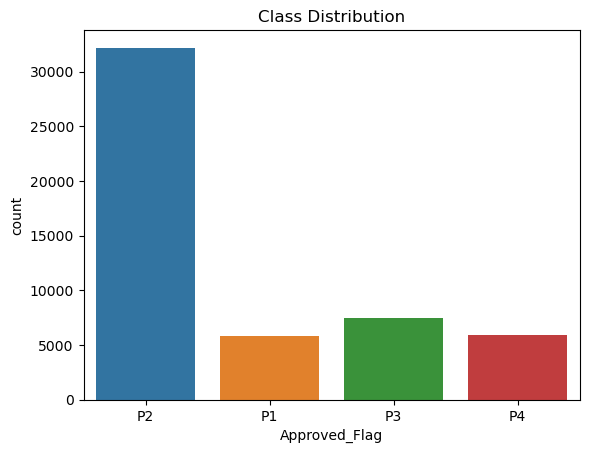

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Approved_Flag', data=df2)
plt.title('Class Distribution')
plt.show()

In [30]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)

In [31]:
df2 = df2.drop(columns_to_be_removed, axis =1)

In [32]:
columns_to_be_removed

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [33]:
df2.shape

(51336, 54)

In [34]:
missing_values = missing_values_table(df2)
missing_values.head(20)

Your selected dataframe has 54 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
tot_enq,6321,12.3
CC_enq,6321,12.3
CC_enq_L6m,6321,12.3
CC_enq_L12m,6321,12.3
PL_enq,6321,12.3
PL_enq_L6m,6321,12.3
PL_enq_L12m,6321,12.3
time_since_recent_enq,6321,12.3
enq_L12m,6321,12.3
enq_L6m,6321,12.3


In [35]:
# Now we are removing the null value rows from our data
for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

In [36]:
missing_values = missing_values_table(df2)
missing_values.head(20)

Your selected dataframe has 54 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [37]:
df2.shape


(42066, 54)

In [38]:
df2.isna().sum()

PROSPECTID                    0
time_since_recent_payment     0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
tot_enq                       0
CC_enq                        0
CC_enq_L6m                    0
CC_enq_L12m                   0
PL_enq                        0
PL_enq_L6m                    0
PL_enq_L12m                   0
time_since_recent_enq         0
enq_L12m                      0
enq_L6m 

In [39]:
missing_values = missing_values_table(df1)
missing_values.head(20)

Your selected dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [40]:
# Now we have removed all the null values

In [41]:
#Now we will merge both the dataFrames so that we can work on them together

In [42]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)


PROSPECTID


In [43]:
# by this we came to know that we can merge our data on this column


In [44]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )


In [45]:
df.shape


(42064, 79)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [47]:
df.isna().sum()

PROSPECTID             0
Total_TL               0
Tot_Closed_TL          0
Tot_Active_TL          0
Total_TL_opened_L6M    0
                      ..
GL_Flag                0
last_prod_enq2         0
first_prod_enq2        0
Credit_Score           0
Approved_Flag          0
Length: 79, dtype: int64

In [48]:
df.isna().sum().sum()

0

In [49]:
# Presence of null will create problem because our model will not understand this otherwise it will give error.

In [50]:
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 79 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [51]:
df.dtypes.value_counts()

int64      60
float64    13
object      6
Name: count, dtype: int64

In [52]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
   

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [53]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MARITALSTATUS      2
EDUCATION          7
GENDER             2
last_prod_enq2     6
first_prod_enq2    6
Approved_Flag      4
dtype: int64

In [54]:
# we will divide the features in Categorical and  Numerical and then we will work on them separately

In [55]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype in ['int64' , 'float64']:
        print(i)
   

PROSPECTID
Total_TL
Tot_Closed_TL
Tot_Active_TL
Total_TL_opened_L6M
Tot_TL_closed_L6M
pct_tl_open_L6M
pct_tl_closed_L6M
pct_active_tl
pct_closed_tl
Total_TL_opened_L12M
Tot_TL_closed_L12M
pct_tl_open_L12M
pct_tl_closed_L12M
Tot_Missed_Pmnt
Auto_TL
CC_TL
Consumer_TL
Gold_TL
Home_TL
PL_TL
Secured_TL
Unsecured_TL
Other_TL
Age_Oldest_TL
Age_Newest_TL
time_since_recent_payment
num_times_delinquent
max_recent_level_of_deliq
num_deliq_6mts
num_deliq_12mts
num_deliq_6_12mts
num_times_30p_dpd
num_times_60p_dpd
num_std
num_std_6mts
num_std_12mts
num_sub
num_sub_6mts
num_sub_12mts
num_dbt
num_dbt_6mts
num_dbt_12mts
num_lss
num_lss_6mts
num_lss_12mts
recent_level_of_deliq
tot_enq
CC_enq
CC_enq_L6m
CC_enq_L12m
PL_enq
PL_enq_L6m
PL_enq_L12m
time_since_recent_enq
enq_L12m
enq_L6m
enq_L3m
AGE
NETMONTHLYINCOME
Time_With_Curr_Empr
pct_of_active_TLs_ever
pct_opened_TLs_L6m_of_L12m
pct_currentBal_all_TL
CC_Flag
PL_Flag
pct_PL_enq_L6m_of_L12m
pct_CC_enq_L6m_of_L12m
pct_PL_enq_L6m_of_ever
pct_CC_enq_L6m_of_

In [56]:
# Identify numerical columns
numerical_columns = [i for i in df.columns if df[i].dtype in ['int32', 'float64']]
print(f'Number of numerical columns: {len(numerical_columns)}') 
print()
print('Numerical columns:', numerical_columns)
print()
print()
# Identify categorical columns
categorical_columns = [i for i in df.columns if df[i].dtype == 'object' or df[i].dtype.name == 'category']
print(f'Number of categorical columns: {len(categorical_columns)}')
print()
print('Categorical columns:', categorical_columns)

Number of numerical columns: 13

Numerical columns: ['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl', 'pct_tl_open_L12M', 'pct_tl_closed_L12M', 'pct_of_active_TLs_ever', 'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever']


Number of categorical columns: 6

Categorical columns: ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2', 'Approved_Flag']


In [57]:
# now we will go ahead with Feature Selection- Checkig with the significance of each of the feature with the Target Variable

In [58]:
# Chi-square test
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)


MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


In [59]:
# Since all the categorical features have pval <=0.05, we will accept all

In [60]:

# VIF for numerical columns
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)


In [61]:
numeric_columns

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [62]:
# Now we need to check how our Numerical varibales are related to the categorical variables
# But before that we need to check for the multicollenearity as well.
# We call it Multicolienarity/ Correlation/ VIF

Multicollinearity and correlation are both concepts related to the relationships between variables in statistical analysis, but they are used in different contexts and have distinct implications. Here's a detailed explanation of each:

### Correlation

**Definition:**
Correlation measures the strength and direction of the linear relationship between two variables. It is a statistical measure expressed by the correlation coefficient, typically denoted as \( r \).

**Key Points:**
- **Range:** The correlation coefficient \( r \) ranges from -1 to +1.
  - \( r = +1 \) indicates a perfect positive linear relationship.
  - \( r = -1 \) indicates a perfect negative linear relationship.
  - \( r = 0 \) indicates no linear relationship.
- **Direction:**
  - A positive correlation means that as one variable increases, the other variable also increases.
  - A negative correlation means that as one variable increases, the other variable decreases.
- **Strength:** The closer the correlation coefficient is to +1 or -1, the stronger the relationship.

**Example:**
If the correlation between the number of hours studied and exam scores is \( r = 0.8 \), it suggests a strong positive relationship: more hours studied are associated with higher exam scores.

### Multicollinearity

**Definition:**
Multicollinearity occurs when two or more predictor (independent) variables in a multiple regression model are highly correlated, meaning they provide redundant information about the response (dependent) variable.

**Key Points:**
- **Impact on Regression Analysis:** Multicollinearity can make it difficult to determine the individual effect of each predictor variable on the response variable because changes in one predictor are associated with changes in another.
- **Variance Inflation Factor (VIF):** A common measure to detect multicollinearity. A VIF value greater than 10 (or sometimes even greater than 5) indicates high multicollinearity.
- **Consequences:**
  - **Unstable Estimates:** Regression coefficients become very sensitive to small changes in the model.
  - **Difficulty in Interpretation:** It becomes challenging to assess the contribution of each predictor.

**Example:**
In a model predicting house prices, if both the size of the house and the number of rooms are included as predictors, there might be multicollinearity because these two variables are likely correlated (larger houses tend to have more rooms).

### Differences Between Correlation and Multicollinearity

- **Context:**
  - **Correlation:** Refers to the relationship between two variables. It can be used in various types of analysis, not just regression.
  - **Multicollinearity:** Specifically concerns the relationships among predictor variables in a multiple regression model.

- **Measurement:**
  - **Correlation:** Measured by the correlation coefficient \( r \), which quantifies the degree of linear relationship between two variables.
  - **Multicollinearity:** Detected using diagnostic measures like the Variance Inflation Factor (VIF) or the condition index, which assess the degree of redundancy among multiple predictors.

- **Implications:**
  - **Correlation:** Provides insight into how two variables move together, useful for understanding relationships and making predictions.
  - **Multicollinearity:** A problem in regression analysis that can obscure the true relationship between predictors and the response variable, leading to unreliable statistical inferences.

In summary, while correlation focuses on the pairwise relationship between two variables, multicollinearity deals with the problem of having multiple predictors that are highly correlated in a regression model, complicating the analysis and interpretation of results.

In [63]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

In [64]:
total_columns

72

In [65]:
for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    
    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)



C:\Users\Balraj Singh\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Balraj Singh\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735
2 --- inf


C:\Users\Balraj Singh\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.0996533816467355
3 --- 5.5813520096427585
4 --- 1.9855843530987785


C:\Users\Balraj Singh\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.3843464059655854
7 --- 3.064658415523423
8 --- 2.898639771299251
9 --- 4.377876915347324
10 --- 2.2078535836958433
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438


C:\Users\Balraj Singh\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427232
15 --- 1.4210050015175733
16 --- 8.083255010190323
16 --- 1.624122752404011
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824577
20 --- 2.623397553527229
21 --- 2.2959970812106167
22 --- 7.360578319196446
22 --- 2.160238777310255
23 --- 2.8686288267891467
24 --- 6.458218003637272
24 --- 2.8474118865638256
25 --- 4.7531981562840855
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808687
26 --- 2.3804746142952653
27 --- 8.60951347651454
27 --- 13.06755093547673
27 --- 3.500040056654653
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.104855915136433
30 --- 2.7971639638512906
31 --- 3.424171203217697
32 --- 10.175021454450935
32 --- 6.408710354561301
32 --- 1.0011511962625623
33 --- 3.069197305397274
34 --- 2.8091261600643724
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.8331649740532

In [66]:
len(columns_to_be_kept)

39

In [67]:
# Now from 72 cols we got 39 cols 
# Now we will check these 39 against the Target variable

In [68]:

# # check Anova for columns_to_be_kept 

from scipy.stats import f_oneway

# columns_to_be_kept_numerical = []

# for i in columns_to_be_kept:
#     a = list(df[i])  
#     b = list(df['Approved_Flag'])  
    
# #     group_P1 = [value for value, group in zip(a, b) if group == 'P1']
# #     group_P2 = [value for value, group in zip(a, b) if group == 'P2']
# #     group_P3 = [value for value, group in zip(a, b) if group == 'P3']
# #     group_P4 = [value for value, group in zip(a, b) if group == 'P4']


#     f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

#     if p_value <= 0.05:
#         columns_to_be_kept_numerical.append(i)
        

# List to hold the names of columns that pass the ANOVA test
columns_to_be_kept_numerical = []

# Loop through each column in columns_to_be_kept
for column in columns_to_be_kept:
    # Extract the values of the current column and the Approved_Flag column
    a = df[column]
    b = df['Approved_Flag']

    # Separate the values into different groups based on the Approved_Flag
    group_P1 = a[b == 'P1']
    group_P2 = a[b == 'P2']
    group_P3 = a[b == 'P3']
    group_P4 = a[b == 'P4']

    # Perform the ANOVA test
    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    # If the p-value is less than or equal to 0.05, append the column name to the list
    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(column)


In [69]:
len(columns_to_be_kept_numerical)

37

In [70]:
 # now we have moved from 39 cols to 37 cols
    

In [71]:
correlation_matrix = df[columns_to_be_kept_numerical].corr()
correlation_matrix

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,time_since_recent_enq,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag
pct_tl_open_L6M,1.000000,0.008614,-0.009159,-0.060640,0.170545,-0.009334,-0.054639,0.029927,-0.117467,0.083169,...,-0.237121,0.241228,-0.008654,-0.087380,0.005123,0.065625,0.296453,0.153742,-0.092713,-0.056438
pct_tl_closed_L6M,0.008614,1.000000,0.344596,0.773130,-0.018916,-0.031005,-0.043790,0.032647,-0.068505,0.093931,...,-0.069375,0.035894,-0.019162,-0.043956,-0.037824,0.032746,0.054255,0.026543,-0.046453,-0.050074
Tot_TL_closed_L12M,-0.009159,0.344596,1.000000,0.456184,0.357300,0.122924,0.030131,0.278413,0.370114,0.579326,...,-0.105005,0.119905,0.046364,-0.005314,0.119371,0.229731,0.053205,0.098675,0.238426,0.026193
pct_tl_closed_L12M,-0.060640,0.773130,0.456184,1.000000,-0.025592,-0.037659,-0.047863,0.039938,-0.059346,0.090224,...,-0.056602,0.015595,-0.025519,-0.044766,-0.047252,0.028758,0.032496,0.013402,-0.022114,-0.054675
Tot_Missed_Pmnt,0.170545,-0.018916,0.357300,-0.025592,1.000000,0.075101,0.077954,0.135581,0.400739,0.345076,...,-0.108927,0.163876,0.043057,0.019043,0.082153,0.137368,0.083059,0.083012,0.268440,0.071584
CC_TL,-0.009334,-0.031005,0.122924,-0.037659,0.075101,1.000000,0.118286,0.217808,0.038511,0.350793,...,-0.053685,0.090794,0.089677,-0.005242,0.784093,0.172256,0.012998,0.171987,0.020507,0.099975
Home_TL,-0.054639,-0.043790,0.030131,-0.047863,0.077954,0.118286,1.000000,0.107303,0.110888,0.055883,...,0.018307,-0.015637,0.078415,0.108468,0.091581,0.087488,-0.035480,0.005158,0.036193,0.868210
PL_TL,0.029927,0.032647,0.278413,0.039938,0.135581,0.217808,0.107303,1.000000,0.067522,0.449052,...,-0.070534,0.137980,0.069502,0.065672,0.178194,0.731779,0.079392,0.105528,0.044499,0.094139
Secured_TL,-0.117467,-0.068505,0.370114,-0.059346,0.400739,0.038511,0.110888,0.067522,1.000000,0.078340,...,0.002874,0.017529,0.053407,0.056523,0.042004,0.054209,-0.030162,0.003390,0.491608,0.100616
Unsecured_TL,0.083169,0.093931,0.579326,0.090224,0.345076,0.350793,0.055883,0.449052,0.078340,1.000000,...,-0.164499,0.186829,0.083457,0.014107,0.296381,0.406371,0.101980,0.158079,0.049142,0.048856


In [ ]:
# df[columns_to_be_kept_numerical].corrwith(df['Approved_Flag']) # this command is mot working becasue out Target col is a String,.,.,
# # e need to convert it to numerical and then we can do the same testing

In [ ]:
# df[columns_to_be_kept_numerical].corrwith(df['Approved_Flag']) # this command is mot working becasue out Target col is a String,.,.,
# # e need to convert it to numerical and then we can do the same testing

In [73]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(df[columns_to_be_kept_numerical], df['Approved_Flag'])
mi

array([0.04439783, 0.0223247 , 0.00613688, 0.02877125, 0.00811832,
       0.        , 0.01184758, 0.01255374, 0.04700146, 0.01067929,
       0.02374672, 0.152564  , 0.01819757, 0.00917408, 0.03118581,
       0.00341496, 0.00304573, 0.08380717, 0.        , 0.        ,
       0.00310959, 0.        , 0.        , 0.        , 0.031457  ,
       0.01653553, 0.05918975, 0.12738293, 0.18678346, 0.00350344,
       0.0162671 , 0.00223093, 0.01097774, 0.08481745, 0.02152224,
       0.01091405, 0.0109283 ])

In [74]:

# feature selection is done for cat and num features


In [75]:
# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]


In [76]:
df.shape

(42064, 43)

In [77]:
# Label encoding for the categorical features
['MARITALSTATUS', 'EDUCATION', 'GENDER' , 'last_prod_enq2' ,'first_prod_enq2']

df['MARITALSTATUS'].unique()    
df['EDUCATION'].unique()
df['GENDER'].unique()
df['last_prod_enq2'].unique()
df['first_prod_enq2'].unique()



array(['PL', 'ConsumerLoan', 'others', 'AL', 'HL', 'CC'], dtype=object)

In [78]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


MARITALSTATUS      2
EDUCATION          7
GENDER             2
last_prod_enq2     6
first_prod_enq2    6
Approved_Flag      4
dtype: int64

In [79]:
print(df['MARITALSTATUS'].unique())    
print(df['EDUCATION'].unique())
print(df['GENDER'].unique())
print(df['last_prod_enq2'].unique())
print(df['first_prod_enq2'].unique())


['Married' 'Single']
['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
['M' 'F']
['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


In [80]:
# Ordinal feature -- EDUCATION
# SSC            : 1
# 12TH           : 2
# GRADUATE       : 3
# UNDER GRADUATE : 3
# POST-GRADUATE  : 4
# OTHERS         : 1
# PROFESSIONAL   : 3


# Others has to be verified by the business end user 


In [81]:
df.loc[df['EDUCATION'] == 'SSC',['EDUCATION']]              = 1
df.loc[df['EDUCATION'] == '12TH',['EDUCATION']]             = 2
df.loc[df['EDUCATION'] == 'GRADUATE',['EDUCATION']]         = 3
df.loc[df['EDUCATION'] == 'UNDER GRADUATE',['EDUCATION']]   = 3
df.loc[df['EDUCATION'] == 'POST-GRADUATE',['EDUCATION']]    = 4
df.loc[df['EDUCATION'] == 'OTHERS',['EDUCATION']]           = 1
df.loc[df['EDUCATION'] == 'PROFESSIONAL',['EDUCATION']]     = 3

In [82]:
df['EDUCATION'].value_counts()



EDUCATION
3    18931
2    11703
1     9532
4     1898
Name: count, dtype: int64

In [83]:
df['EDUCATION'] = df['EDUCATION'].astype(int)



In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pct_tl_open_L6M            42064 non-null  float64
 1   pct_tl_closed_L6M          42064 non-null  float64
 2   Tot_TL_closed_L12M         42064 non-null  int64  
 3   pct_tl_closed_L12M         42064 non-null  float64
 4   Tot_Missed_Pmnt            42064 non-null  int64  
 5   CC_TL                      42064 non-null  int64  
 6   Home_TL                    42064 non-null  int64  
 7   PL_TL                      42064 non-null  int64  
 8   Secured_TL                 42064 non-null  int64  
 9   Unsecured_TL               42064 non-null  int64  
 10  Other_TL                   42064 non-null  int64  
 11  Age_Oldest_TL              42064 non-null  int64  
 12  Age_Newest_TL              42064 non-null  int64  
 13  time_since_recent_payment  42064 non-null  int

In [85]:
# we will One Hot Encode all the remainig Categorical Columns

In [86]:


df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS','GENDER', 'last_prod_enq2' ,'first_prod_enq2'])


In [87]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_open_L6M               42064 non-null  float64
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Tot_TL_closed_L12M            42064 non-null  int64  
 3   pct_tl_closed_L12M            42064 non-null  float64
 4   Tot_Missed_Pmnt               42064 non-null  int64  
 5   CC_TL                         42064 non-null  int64  
 6   Home_TL                       42064 non-null  int64  
 7   PL_TL                         42064 non-null  int64  
 8   Secured_TL                    42064 non-null  int64  
 9   Unsecured_TL                  42064 non-null  int64  
 10  Other_TL                      42064 non-null  int64  
 11  Age_Oldest_TL                 42064 non-null  int64  
 12  Age_Newest_TL                 42064 non-null  int64  
 13  t

In [88]:
df_encoded.GENDER_M

0         True
1        False
2         True
3         True
4         True
         ...  
42059     True
42060     True
42061     True
42062    False
42063     True
Name: GENDER_M, Length: 42064, dtype: bool

In [89]:
k = df_encoded.describe()
k

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,enq_L3m,NETMONTHLYINCOME,Time_With_Curr_Empr,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,EDUCATION
count,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,...,42064.000000,4.206400e+04,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,0.179032,0.097783,0.825504,0.160365,0.525746,0.145921,0.076241,0.328000,2.921334,2.341646,...,1.230458,2.692990e+04,110.345783,0.102962,0.193063,0.195497,0.064186,0.252235,0.056580,2.313689
std,0.278043,0.210957,1.537208,0.258831,1.106442,0.549314,0.358582,0.916368,6.379764,3.405397,...,2.069461,2.084300e+04,75.629967,0.303913,0.394707,0.367414,0.225989,0.434300,0.231042,0.871070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.800000e+04,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,2.400000e+04,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.333000,0.100000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,...,2.000000,3.100000e+04,131.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
max,1.000000,1.000000,33.000000,1.000000,34.000000,27.000000,10.000000,29.000000,235.000000,55.000000,...,42.000000,2.500000e+06,1020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [90]:
# Machine Learing model fitting
# Data processing

# 1. Random Forest

y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)


In [91]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(26920, 54)
(26920,)
(6731, 54)
(6731,)
(8413, 54)
(8413,)


In [108]:
y.unique()


array(['P2', 'P1', 'P3', 'P4'], dtype=object)

In [92]:

# # Machine Learing model fitting
# # Data processing

# 1. Random Forest

# y = df_encoded['Approved_Flag']
# x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )


# x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators = 200, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_val)



accuracy = accuracy_score(y_val, y_pred)
print ()
print(f'Accuracy: {accuracy}')
print ()
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred)


for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()
    



Accuracy: 0.7685336502748478

Class p1:
Precision: 0.8296875
Recall: 0.69140625
F1 Score: 0.7542613636363638

Class p2:
Precision: 0.7953830010493179
Recall: 0.9392812887236679
F1 Score: 0.8613636363636363

Class p3:
Precision: 0.4391304347826087
Recall: 0.19980217606330367
F1 Score: 0.2746430999320191

Class p4:
Precision: 0.7505773672055427
Recall: 0.7088331515812432
F1 Score: 0.7291082445316881



In [251]:
!pip3 install xgboost

In [94]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(26920, 54)
(26920,)
(6731, 54)
(6731,)
(8413, 54)
(8413,)


In [109]:

# 2. xgboost

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)





xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print ()
print(f'Accuracy: {accuracy:.2f}')
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()




Accuracy: 0.78

Class p1:
Precision: 0.8179271708683473
Recall: 0.7604166666666666
F1 Score: 0.7881241565452091

Class p2:
Precision: 0.8227313167259787
Recall: 0.916728624535316
F1 Score: 0.8671902473332551

Class p3:
Precision: 0.44648318042813456
Recall: 0.2888229475766568
F1 Score: 0.3507507507507508

Class p4:
Precision: 0.7681660899653979
Recall: 0.7262813522355507
F1 Score: 0.7466367713004484



In [110]:
# 3. Decision Tree
from sklearn.tree import DecisionTreeClassifier


y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)



dt_model = DecisionTreeClassifier(max_depth=20, min_samples_split=10)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print ()
print(f"Accuracy: {accuracy:.2f}")
print ()

precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()




Accuracy: 0.72

Class p1:
Precision: 0.7113665389527458
Recall: 0.7252604166666666
F1 Score: 0.7182462927143778

Class p2:
Precision: 0.8115008351228824
Recall: 0.8428748451053284
F1 Score: 0.8268903476780939

Class p3:
Precision: 0.35200845665961944
Recall: 0.3293768545994065
F1 Score: 0.34031681144609094

Class p4:
Precision: 0.7040690505548706
Recall: 0.6226826608505998
F1 Score: 0.6608796296296297



In [254]:
# xgboost is giving me best results
# Random Forest : 0.76
# Xgboost :       0.78
# Decision Tree:  0.72
    
# We will further finetune it

In [111]:
# Apply standard scaler 

from sklearn.preprocessing import StandardScaler

columns_to_be_scaled = ['Age_Oldest_TL','Age_Newest_TL','time_since_recent_payment',
'max_recent_level_of_deliq','recent_level_of_deliq',
'time_since_recent_enq','NETMONTHLYINCOME','Time_With_Curr_Empr']

for i in columns_to_be_scaled:
    column_data = df_encoded[i].values.reshape(-1, 1)
    scaler = StandardScaler()
    scaled_column = scaler.fit_transform(column_data)
    df_encoded[i] = scaled_column

In [113]:
df_encoded.head().T


,0,1,2,3,4
pct_tl_open_L6M,0.0,0.0,0.125,0.0,0.0
pct_tl_closed_L6M,0.0,0.0,0.0,0.0,0.0
Tot_TL_closed_L12M,0,0,0,0,1
pct_tl_closed_L12M,0.0,0.0,0.0,0.0,0.167
Tot_Missed_Pmnt,0,0,1,0,0
CC_TL,0,0,0,0,0
Home_TL,0,0,0,0,0
PL_TL,4,0,0,0,0
Secured_TL,1,0,2,3,6
Unsecured_TL,4,1,6,0,0


In [114]:
# Here we cant to evaluate whether there is any improvement after standard scaling



import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

xgb_classifier = xgb.XGBClassifier(objective='multi:softmax',  num_class=4)



y = df_encoded['Approved_Flag']
x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

x_train_val, x_test, y_train_val, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)



xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.78
Class p1:
Precision: 0.8179271708683473
Recall: 0.7604166666666666
F1 Score: 0.7881241565452091

Class p2:
Precision: 0.8227313167259787
Recall: 0.916728624535316
F1 Score: 0.8671902473332551

Class p3:
Precision: 0.44648318042813456
Recall: 0.2888229475766568
F1 Score: 0.3507507507507508

Class p4:
Precision: 0.7681660899653979
Recall: 0.7262813522355507
F1 Score: 0.7466367713004484



In [ ]:
# No improvement in metrices

In [100]:
# model_output = pd.DataFrame(answers_grid)

In [ ]:
# model_output

In [106]:
# model_output.to_csv('C:/Users/Balraj Singh/Projects as a Data Scientist/Credit Risk Monitoring Project/model_output.csv')

In [ ]:
# Now the entire step of training the Model using GridSearchCSV

In [122]:
# Hyperparameter tuning in xgboost
from sklearn.model_selection import GridSearchCV
# x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# y = df_encoded['Approved_Flag']
# x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# x_train_val, x_test, y_train_val, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

# Define the XGBClassifier with the initial set of hyperparameters
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Define the parameter grid for hyperparameter tuning

param_grid = {
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'alpha'           : [1, 10, 100],
  'n_estimators'    : [10,50,100]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_val, y_val)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'alpha': 1, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Test Accuracy: 0.7795275590551181


In [256]:
# Predition on Test data


In [ ]:
#Best Hyperparameters: {'alpha': 1, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [123]:
 model = xgb.XGBClassifier(objective='multi:softmax',  
                                       num_class=4,
                                       colsample_bytree = 0.7,
                                       learning_rate = 0.1,
                                       max_depth = 5,
                                       alpha = 1,
                                       n_estimators = 100)
               

# y = df_encoded['Approved_Flag']
# x = df_encoded. drop ( ['Approved_Flag'], axis = 1 )

# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# x_train_val, x_test, y_train_val, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)


model.fit(x_train, y_train)
  

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4, ...)

In [124]:

# Predict on training and testing sets
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)


# Calculate train and test results

train_accuracy =  accuracy_score (y_train, y_pred_train)
val_accuracy  =  accuracy_score (y_val , y_pred_val)

In [125]:
train_accuracy

0.8093239227340268

In [126]:
val_accuracy

0.7795275590551181

In [127]:
y_pred_test = model.predict(x_test)

In [128]:
test_accuracy =  accuracy_score (y_test, y_pred_test)

In [129]:
test_accuracy

0.7784381314632117

In [ ]:
# a3['Approved_Flag'].value_counts()

In [130]:
# accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {test_accuracy:.2f}')


precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_test)

for i, v in enumerate(['p1', 'p2', 'p3', 'p4']):
    print(f"Class {v}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

Accuracy: 0.78
Class p1:
Precision: 0.8535754824063564
Recall: 0.7416173570019724
F1 Score: 0.7936675461741425

Class p2:
Precision: 0.8131811105345096
Recall: 0.9318136769078296
F1 Score: 0.8684648069462406

Class p3:
Precision: 0.4715447154471545
Recall: 0.26264150943396225
F1 Score: 0.3373727581192438

Class p4:
Precision: 0.7384007897334649
Recall: 0.7269193391642371
F1 Score: 0.732615083251714

